# Lab 4

## Import libs and connect to database

In [3]:
import pandas
import configparser
import psycopg2

In [4]:
config=configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd'] 

In [5]:

conn= psycopg2.connect(
                        host=host,
                        user=user,
                        password=pwd,
                        dbname=db
                        )

In [6]:
cur=conn.cursor()

## q1

In [7]:
sql_q1= """
        select * from gp7.student
        """

In [13]:
df=pandas.read_sql_query(sql_q1, conn)
df[:] 

,s_email,s_name,major
0,ab@jmu.edu,Abby Bee,IA
1,cd@jmu.edu,Cindy Dale,ISAT
2,ef@jmu.edu,Emily Free,Psychology
3,gh@jmu.edu,Gerald Herold,IA
4,ij@jmu.edu,Isaac Jams,Political Science
5,kl@jmu.edu,Kyle Laurens,Geographic Science
6,mn@jmu.edu,Mary Neece,IA
7,op@jmu.edu,Olivia Price,English
8,qr@jmu.edu,Quinten Reece,IA
9,st@jmu.edu,Sarah Thomas,ISAT


## q2

In [9]:
sql_q2="""
        select gp7.professor.p_name,
        gp7.course.c_name
        from gp7.professor
        inner join gp7.course
        on gp7.professor.p_email=gp7.course.p_email

        """

In [11]:
df=pandas.read_sql_query(sql_q2, conn)
df[:] 

,p_name,c_name
0,Noel Hendrickson,Reasoning Methods
1,Stephen Marrin,Capstone Project
2,Kathleen Moore,Technology Apps
3,Ronald Raab,WMD Awareness
4,Anthony Teate,Data Mining
5,Timothy Walton,Hypothesis Testing
6,Xuebin Wei,Machine Learning
7,Orlandrew Danzell,Nat. Security
8,Barry Zulauf,Telecommunication
9,new_p,new_c_name


# q3

In [12]:
sql_q3= """
        select c_number,
        count(c_number) as enrolled
        from gp7.enroll_list
        group by c_number
        order by enrolled desc
        """

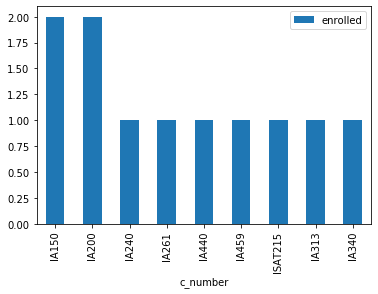

In [15]:
df=pandas.read_sql_query(sql_q3, conn)
df.plot.bar(y='enrolled', x='c_number') 

## q4

In [21]:
sql_q4="""
        select gp7.professor.p_name,
        count (gp7.course.c_name) as teaching_number
        from gp7.professor
        inner join gp7.course
        on gp7.professor.p_email=gp7.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

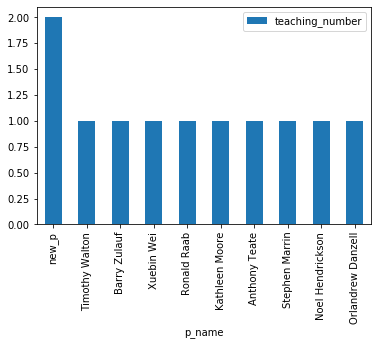

In [23]:
df=pandas.read_sql_query(sql_q4, conn)
df.plot.bar(y='teaching_number', x='p_name') 

## q5

In [34]:
sql_q5_professor= """
                insert into gp7.professor(p_email, p_name,office)
                values('{}','{}', '{}') 
                """ .format('new_p2@jmu.edu', 'new_p2', 'new_off') 

In [35]:
cur.execute(sql_q5_professor)

In [36]:
conn.commit()

In [37]:
df=pandas.read_sql_query('select * from gp7.professor', conn)
df[:] 

,p_email,p_name,office
0,hendrix@jmu.edu,Noel Hendrickson,ISAT317
1,marrinsp@jmu.edu,Stephen Marrin,EnGeo2104
2,moore8ka@jmu.edu,Kathleen Moore,ISAT116
3,raabrw@jmu.edu,Ronald Raab,ISAT156
4,teateaa@jmu.edu,Anthony Teate,ISAT342
5,waltontr@jmu.edu,Timothy Walton,ISAT326
6,weixx@jmu.edu,Xuebin Wei,ISAT 326
7,danzelox@jmu.edu,Orlandrew Danzell,ISAT1
8,zulaufba@jmu.edu,Barry Zulauf,--
9,new_p@jmu.edu,new_p,new_office


In [38]:
sql_q5_course= """
                insert into gp7.course(c_number, c_name, room, p_email)
                values('{}','{}', '{}', '{}') 
                """ .format('IA_new2', 'new_c_name', 'online', 'new_p2@jmu.edu') 

In [39]:
cur.execute(sql_q5_course)

In [40]:
conn.commit()

In [41]:
df=pandas.read_sql_query('select * from gp7.course', conn)
df[:] 

,c_number,c_name,room,p_email
0,IA313,Reasoning Methods,ISAT0148,hendrix@jmu.edu
1,IA440,Capstone Project,EnGeo1301,marrinsp@jmu.edu
2,IA240,Technology Apps,online,moore8ka@jmu.edu
3,IA459,WMD Awareness,EnGeo1301,raabrw@jmu.edu
4,IA340,Data Mining,online,teateaa@jmu.edu
5,IA261,Hypothesis Testing,ISAT0148,waltontr@jmu.edu
6,IA480,Machine Learning,online,weixx@jmu.edu
7,IA200,Nat. Security,Festival7,danzelox@jmu.edu
8,ISAT215,Telecommunication,EnGeo2020,zulaufba@jmu.edu
9,IA_new,new_c_name,online,new_p@jmu.edu


## q6

In [42]:
sql_q6_course= """
                update gp7.course
                set p_email='{}'
                where p_email='{}'
                """ .format('new_p@jmu.edu','weixx@jmu.edu') 

In [43]:
cur.execute(sql_q6_course)

In [44]:
conn.commit()

In [45]:
df=pandas.read_sql_query('select * from gp7.course', conn)
df[:] 

,c_number,c_name,room,p_email
0,IA313,Reasoning Methods,ISAT0148,hendrix@jmu.edu
1,IA440,Capstone Project,EnGeo1301,marrinsp@jmu.edu
2,IA240,Technology Apps,online,moore8ka@jmu.edu
3,IA459,WMD Awareness,EnGeo1301,raabrw@jmu.edu
4,IA340,Data Mining,online,teateaa@jmu.edu
5,IA261,Hypothesis Testing,ISAT0148,waltontr@jmu.edu
6,IA200,Nat. Security,Festival7,danzelox@jmu.edu
7,ISAT215,Telecommunication,EnGeo2020,zulaufba@jmu.edu
8,IA_new,new_c_name,online,new_p@jmu.edu
9,IA150,Intro to IA,EnGeo2301,new_p@jmu.edu


In [46]:
sql_q6_professor= """
                delete from gp7.professor
                where p_email='{}'
                """ .format ('weixx@jmu.edu')

In [ ]:
cur.execute(sql_q6_professor)

In [ ]:
conn.commit()

In [49]:
df=pandas.read_sql_query('select * from gp7.professor', conn)
df[:] 

,p_email,p_name,office
0,hendrix@jmu.edu,Noel Hendrickson,ISAT317
1,marrinsp@jmu.edu,Stephen Marrin,EnGeo2104
2,moore8ka@jmu.edu,Kathleen Moore,ISAT116
3,raabrw@jmu.edu,Ronald Raab,ISAT156
4,teateaa@jmu.edu,Anthony Teate,ISAT342
5,waltontr@jmu.edu,Timothy Walton,ISAT326
6,danzelox@jmu.edu,Orlandrew Danzell,ISAT1
7,zulaufba@jmu.edu,Barry Zulauf,--
8,new_p@jmu.edu,new_p,new_office
9,new_p2@jmu.edu,new_p2,new_off


## close connection

In [50]:
cur.close()
conn.close()